Problem Statement: Making a virtual assistant that can undersatnd various fashion trends from various instagram images and thus launching targeted marketing campaigns.

Goal: Classify the images into 10 classes:
0:T-shirt/top   1:Trouser   2:Pullover   3:Dress   4:Coat   5:Sandal   6:Shirt   7:Sneaker   8:Bag   9:Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv")

In [4]:
fashion_test_df = pd.read_csv("fashion-mnist_test.csv")

VISUALIZATION OF DATA

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [12]:
training = np.array(fashion_train_df, dtype='float32')

In [13]:
testing = np.array(fashion_test_df, dtype='float32')

8.0


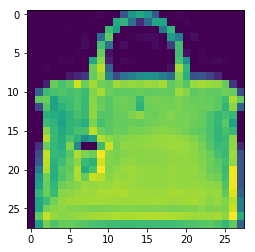

In [29]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i, 0]
print(label)
plt.show()

In [34]:
X_train = training[:,1:]/255  #Normalization
y_train = training[:,0]

In [35]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [43]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))  #The dimension needed to fit into the keras model
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [44]:
X_train.shape

(48000, 28, 28, 1)

In [45]:
X_test.shape

(10000, 28, 28, 1)

In [46]:
X_validate.shape

(12000, 28, 28, 1)

In [47]:
import keras

C:\Program Files (x86)\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [51]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation='relu'))

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


Instructions for updating:
Colocations handled automatically by placer.


In [53]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
cnn_model.add(Flatten())

In [56]:
cnn_model.add(Dense(output_dim=32, activation='relu'))

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [57]:
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [58]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [61]:
cnn_model.fit(X_train,y_train, batch_size=512, nb_epoch= 50, verbose=1, validation_data=(X_validate,y_validate))

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s 596us/step - loss: 0.2036 - acc: 0.9285 - val_loss: 0.2535 - val_acc: 0.9092
Epoch 2/50
48000/48000 [==============================] - 28s 589us/step - loss: 0.1999 - acc: 0.9292 - val_loss: 0.2572 - val_acc: 0.9088
Epoch 3/50
48000/48000 [==============================] - 28s 590us/step - loss: 0.1962 - acc: 0.9314 - val_loss: 0.2513 - val_acc: 0.9085
Epoch 4/50
48000/48000 [==============================] - 28s 590us/step - loss: 0.1936 - acc: 0.9321 - val_loss: 0.2487 - val_acc: 0.9092
Epoch 5/50
48000/48000 [==============================] - 30s 630us/step - loss: 0.1893 - acc: 0.9339 - val_loss: 0.2505 - val_acc: 0.9107
Epoch 6/50
48000/48000 [==============================] - 30s 633us/step - loss: 0.1876 - acc: 0.9344 - val_loss: 0.2489 - val_acc: 0.9114
Epoch 7/50
48000/48000 [==============================] - 31s 653us/step - loss: 0.1855 - acc: 0.9351 - val_loss: 0.

In [63]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test accuracy: {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 2s 233us/step
Test accuracy: 0.909


In [66]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

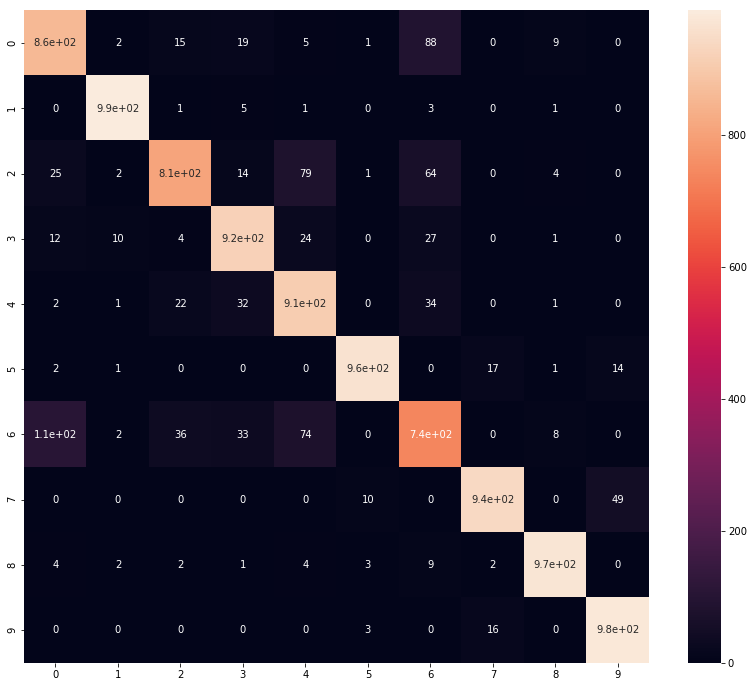

In [76]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True)
plt.show()

In [77]:
from sklearn.metrics import classification_report
num_classes= 10
target_names = ["class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names= target_names))

             precision    recall  f1-score   support

    class 0       0.85      0.86      0.86      1000
    class 1       0.98      0.99      0.98      1000
    class 2       0.91      0.81      0.86      1000
    class 3       0.90      0.92      0.91      1000
    class 4       0.83      0.91      0.87      1000
    class 5       0.98      0.96      0.97      1000
    class 6       0.77      0.74      0.75      1000
    class 7       0.96      0.94      0.95      1000
    class 8       0.97      0.97      0.97      1000
    class 9       0.94      0.98      0.96      1000

avg / total       0.91      0.91      0.91     10000



Conclusion: The model very well classifies the images except a few where model might get confused due to very similar features like t-shirt/tops and shirts, thus giving an avg f1_score of 91%.